# SRGAN
This notebook will contain demonstrations on how to train and use the SRGAN network. 

In [3]:
!ls -lrt libs

total 44
-rw-rw-r-- 1 ubuntu ubuntu  4850 Oct  7 11:57 util.py
-rw-rw-r-- 1 ubuntu ubuntu     0 Oct  7 11:57 __init__.py
-rw-rw-r-- 1 ubuntu ubuntu 12695 Oct  7 13:29 \
-rw-rw-r-- 1 ubuntu ubuntu 12695 Oct  7 13:47 srgan.py
drwxrwxr-x 2 ubuntu ubuntu  4096 Oct  8 05:10 __pycache__


In [4]:
!cat libs/util.py

import os
import imageio
import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt


class DataLoader():
    def __init__(self, datapath, height_hr, width_hr, height_lr, width_lr, scale):
        """        
        :param string datapath: filepath to training images
        :param int height_hr: Height of high-resolution images
        :param int width_hr: Width of high-resolution images
        :param int height_hr: Height of low-resolution images
        :param int width_hr: Width of low-resolution images
        :param int scale: Upscaling factor
        """

        # Store the datapath
        self.datapath = datapath
        self.height_hr = height_hr
        self.height_lr = height_lr
        self.width_hr = width_hr
        self.width_lr = width_lr
        self.scale = scale

        # Get the paths for all the images
        self.img_paths = []
        for dirpath, _, filenames in os.walk(self.datapath):
            for filename in [f for f in filenam

In [5]:
import imageio
import numpy as np

from skimage.transform import resize
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [19]:
!ls -lrt data

total 1724
-rw-rw-r-- 1 ubuntu ubuntu  264609 Oct  7 11:57 sample.jpg
-rw-rw-r-- 1 ubuntu ubuntu  144910 Oct  7 11:57 buket.jpg
drwxrwxr-x 4 ubuntu ubuntu    4096 Oct  7 12:18 imagenet
-rw-rw-r-- 1 ubuntu ubuntu 1340403 Oct  7 12:23 memo.jpeg
drwxrwxr-x 2 ubuntu ubuntu    4096 Oct  7 12:53 weights


In [8]:
import sys

sys.path

['',
 '/home/ubuntu/src/cntk/bindings/python',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python36.zip',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/lib-dynload',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

In [13]:
sys.path.insert(0, '/home/ubuntu/SRGAN-Keras/libs')

In [14]:
sys.path

['/home/ubuntu/SRGAN-Keras/libs',
 '/home/ubuntu/SRGAN-Keras/',
 '',
 '/home/ubuntu/src/cntk/bindings/python',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python36.zip',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/lib-dynload',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

In [15]:
from libs.srgan import SRGAN
from libs.util import plot_test_images

# 1. Loading Data
First we'll load some data to use

In [2]:
dataset = fetch_olivetti_faces("./data/olivetti_faces")
for i, img in enumerate(dataset.images):
    imageio.imwrite(f"./data/olivetti_faces/{i}.png", (img*255).astype(np.uint8))

## 1. Training

To train the SRGAN, we first instantiate the model

In [16]:
gan = SRGAN()

And then perform training, which has options for regularly outputting the result on a few test images, and which regularly saves the model weights (in data/weights/ directory). You should change:

* datapath: to the directory containing all your training images
* test_images: to a list of image paths for testing during training

During training, check out the ./images/samples/ directory for test sample results. Use the rest of the parameters to play with batch_size, how often to save the weights and perform testing, and how often to print progress. Here we only train the model on the limited olivetty faces dataset, and only for a short amount of epochs

In [4]:
gan.train(
    epochs=1000,
    dataname='olivetti',
    datapath='./data/olivetti_faces/',
    batch_size=1,
    test_images=[
        './data/olivetti_faces/0.png'
    ],
    test_frequency=100,
    test_path='./images/samples/',
    weight_path='./data/weights/',
    weight_frequency=100,
    print_frequency=100
)

>> Found 400 images in dataset


C:\Users\MAFG\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\keras\engine\training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 0/1000 | Time: 0:00:17.347621
>> Generator: loss=8.207e+01, model_3_loss=5.741e-01, model_1_loss=8.207e+01
>> Discriminator: loss=2.318e-01, acc=6.113e-01

Epoch 100/1000 | Time: 0:00:51.123415
>> Generator: loss=1.084e+01, model_3_loss=7.277e-03, model_1_loss=1.084e+01
>> Discriminator: loss=1.136e-04, acc=1.000e+00

Epoch 200/1000 | Time: 0:01:18.214827
>> Generator: loss=1.462e+00, model_3_loss=2.404e-03, model_1_loss=1.462e+00
>> Discriminator: loss=8.531e-06, acc=1.000e+00

Epoch 300/1000 | Time: 0:01:48.748940
>> Generator: loss=1.026e+00, model_3_loss=1.949e-03, model_1_loss=1.026e+00
>> Discriminator: loss=1.557e-05, acc=1.000e+00

Epoch 400/1000 | Time: 0:02:19.119570
>> Generator: loss=6.910e-01, model_3_loss=1.578e-03, model_1_loss=6.910e-01
>> Discriminator: loss=3.381e-06, acc=1.000e+00

Epoch 500/1000 | Time: 0:02:47.791386
>> Generator: loss=1.262e+00, model_3_loss=2.502e-03, model_1_loss=1.262e+00
>> Discriminator: loss=1.939e-05, acc=1.000e+00

Epoch 600/1000 | T

# 2. Testing
We have trained the network on imagenet for 100.000 iterations with a batch-size of 1. Below we show how to load these weights, and use them to create an SR version of a given image

In [17]:
gan.load_weights('./data/weights/imagenet_generator.h5', './data/weights/imagenet_discriminator.h5')

And then we can use the following utility function to take a test-image, super-resolve it, and then show the results

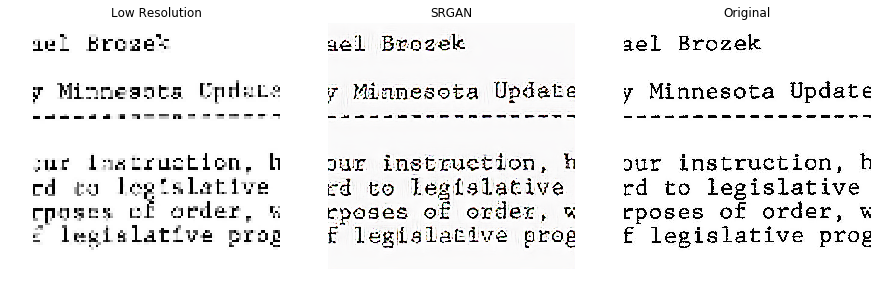

In [26]:
# Load image & scale it
img_hr = imageio.imread("./data/memo_resized.jpeg").astype(np.float) / 127.5 - 1

# Create a low-resolution version of it
lr_shape = (int(img_hr.shape[0]/5), int(img_hr.shape[1]/5))
lr_shape_2 = (int(img_hr.shape[0]/4), int(img_hr.shape[1]/4))
img_lr = resize(img_hr, lr_shape, mode='constant')
img_lr_2 = resize(img_hr, lr_shape_2, mode='constant')

# Predict high-resolution version (add batch dimension to image)
img_sr = gan.generator.predict(np.expand_dims(img_lr_2, 0))

# Remove batch dimension
img_sr = np.squeeze(img_sr, axis=0)

# Images and titles
images = {
    'Low Resolution': img_lr, 'SRGAN': img_sr, 'Original': img_hr
}

# Plot the images. Note: rescaling and using squeeze since we are getting batches of size 1                    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(images.items()):
    axes[i].imshow(0.5 * img + 0.5)
    axes[i].set_title(title)
    axes[i].axis('off')
plt.show()